### Data preparation

In [2]:
#we'll import the necessary libraries
import pandas as pd
import numpy as np

In [3]:
#let's download and load the datasets
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2025-10-12 12:56:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.008s  

2025-10-12 12:56:43 (177 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [5]:
df = pd.read_csv('data.csv')

In [6]:
#we'll view the first 5 rows of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#to view the length(rows) of the dataframe
len(df)

11914

In [8]:
#to make the columns consistent
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
#let's check if the changes is effected
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory data analysis

In [11]:
#we'll import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

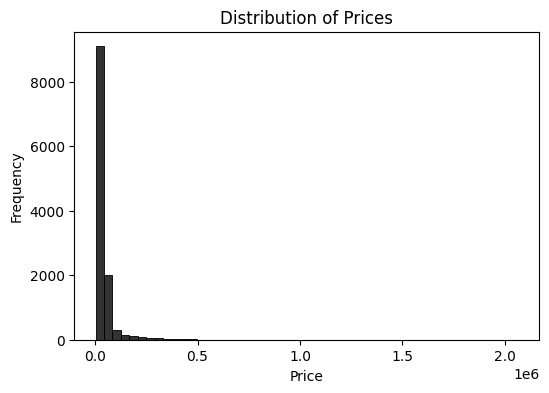

In [12]:
plt.figure(figsize=(6,4))

sns.histplot(df.msrp, bins=50, color='black', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Prices')

plt.show()

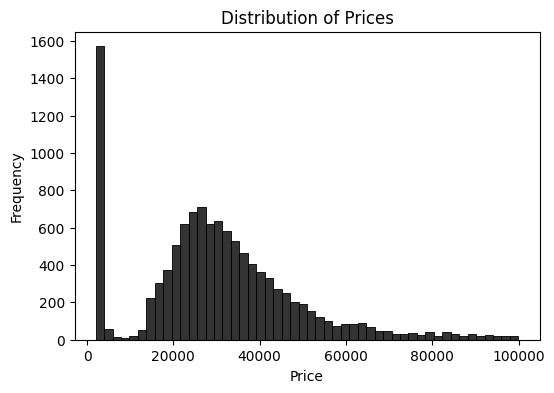

In [13]:
#the distribution has a long tail. we need to zoom in a bit
plt.figure(figsize=(6,4))

sns.histplot(df.msrp[df.msrp < 100000], bins=50, color='black', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Prices')

plt.show()

In [14]:
#we need to get rid of the tail, so we'll apply the logarithms to the prices
log_price = np.log1p(df.msrp)

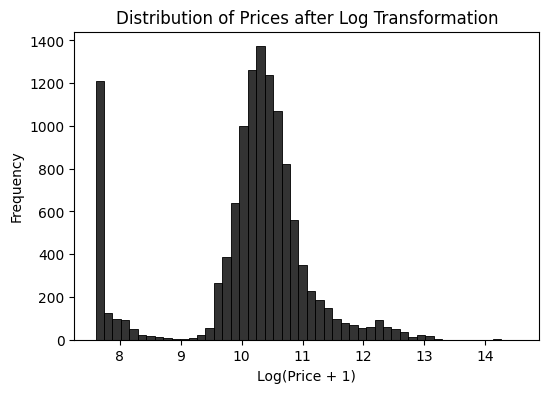

In [15]:
plt.figure(figsize=(6,4))

sns.histplot(log_price, bins=50, color='black', alpha=0.8)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of Prices after Log Transformation')

plt.show()

In [16]:
#next, we'll look at the missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the Validation Framework

In [17]:
np.random.seed(2) #to make sure we get the same shuffle

n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)

In [18]:
n_train = n-(n_val + n_test)

In [19]:
n, n_train, n_test, n_val

(11914, 7150, 2382, 2382)

In [20]:
idx = np.arange(n)
np.random.shuffle(idx) #this is to shuffle the datasets

df_shuffled = df.iloc[idx]

#show the dataset in range
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

#we need to reset the index, and reasign it back to the original df
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#let's apply the log transfromation to the y
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#we need to remove the msrp variable from our dataframe. we need to delete it, so we don't accidentally use it while training the model
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [21]:
#let's check the lenght
len(df_train)

7150

### Linear Regression

In [22]:
#manual implementation of Linear Regression using the Normal Equation (closed-form solution)
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

### Baseline solution

In [23]:
#we'll extract the numerical columns. we'll build the model using them.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0) #to fill in the missing values
    X = df_num.values
    return X

In [24]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [25]:
y_pred = w0 + X_train.dot(w)

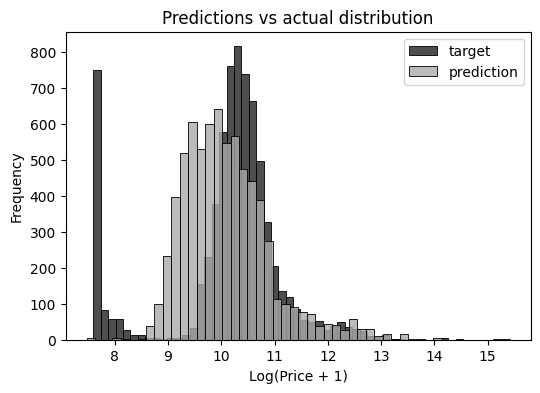

In [26]:
#we'll plot our predictions to see if they look similar to the target variable we want to predict
plt.figure(figsize=(6,4))

sns.histplot(y_train, label='target', bins=50, color='#222222', alpha=0.8)
sns.histplot(y_pred, label='prediction', bins=50, color='#aaaaaa', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

- we need to objectively evaluate the performance of the regression model

### RMSE - Evaluating regression model 

In [27]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [28]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [29]:
#validating the model 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [30]:
rmse(y_val, y_pred)

np.float64(0.7616530991301627)

### Simple feature engineering

In [31]:
#we need to improve the model
df_train.year.max()

np.int64(2017)

In [32]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [33]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print ('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print ('validation:', rmse(y_val, y_pred))

train: 0.5175055465840046
validation: 0.5172055461058327


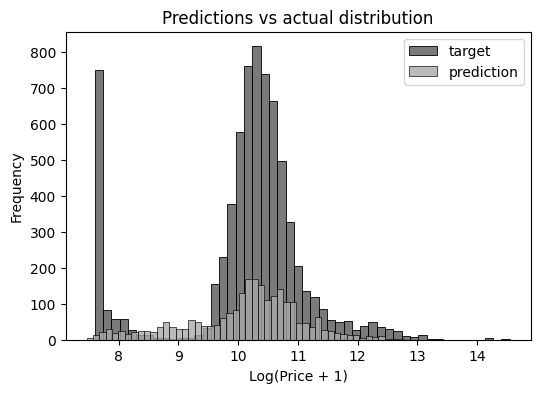

In [34]:
#we'll plot our prediction
plt.figure(figsize=(6,4))

sns.histplot(y_train, label='target', bins=50, color='#222222', alpha=0.6)
sns.histplot(y_pred, label='prediction', bins=50, color='#aaaaaa', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Categorical variables 

In [35]:
#the top 5 most frequent categories for each categorical column and stores them in a dictionary
categorical_columns = [
    'make', 'transmission_type', 'engine_fuel_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [36]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['year'] #Creates a new feature: car age
    features = base + ['age']

    for v in [2, 3, 4]: #One-Hot Encoding for Number of Doors
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items(): #One-Hot Encoding for Categorical Variables
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [37]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print ('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print ('validation:', rmse(y_val, y_pred))

train: 118.93003839177004
validation: 64.2880378188286


In [38]:
w0

np.float64(-1352545823985131.8)

### Regulaization

In [39]:
#Linear Regression with L2 Regularization (Ridge Regression)
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r*np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [40]:
X_train = prepare_X(df_train)

In [41]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print ('%5s, %.2f, %.2f, %.2f' % (r, w0, w[13], w[21]))

    0, -1352545823985131.75, -9.15, -449.70
0.001, 6.29, -0.11, -0.33
 0.01, 6.28, -0.11, -0.33
  0.1, 6.19, -0.11, -0.32
    1, 5.63, -0.11, -0.24
   10, 4.28, -0.10, 0.15


In [42]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 118.93003839177004
val 64.2880378188286


In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46020995202138715
val 0.4565219900929484


### Tuning the model

In [44]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]: #testing different regularization strengths
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    print ('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4565166699580211
0.0001 0.4565170636764608
 0.001 0.45651750884147624
  0.01 0.4565219900929484
   0.1 0.4565692762995601
     1 0.4572204317994751
     5 0.4622930016737279
    10 0.4701456932099117


In [45]:
#final model training and evaluation pipeline
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

val: 0.4565219900929484
test: 0.45223322542844696


### Using the model

In [46]:
#extracting a single car from the test set and converting it to a dictionary
i = 2 #Sets the index to 2 
ad = df_test.iloc[i].to_dict() #Extracts one row and converts it to a dictionary
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [47]:
#making a prediction for a single car and converting it back from log-space
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred) #Convert Back from Log-Space
suggestion

np.float64(28932.02318758764)